In [2]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

In [32]:
import math

def G_equation(xi, G_Cl2, G_Br2, G_BrCl, R, T):
    term1 = (1 - xi) * G_Cl2 + (1 - xi) * G_Br2 + 2 * xi * G_BrCl + 2 * (1 - xi) * R * T * np.log((1 - xi) / 2) + 2 * xi * R * T * np.log(xi)
    G_xi = term1 
    return G_xi

# Example usage:
xi_value = np.linspace(0,0.99,50)  # Replace with your desired value of xi
G_Cl2_value =  0  # Replace with the actual value of G_Cl2
G_Br2_value = 0  # Replace with the actual value of G_Br2
G_BrCl_value = -3.694  # Replace with the actual value of G_BrCl
R_value = 8.314  # Replace with the appropriate value of the gas constant R
T_value = 298.15  # Replace with the temperature in Kelvin

result = G_equation(xi_value, G_Cl2_value, G_Br2_value, G_BrCl_value, R_value, T_value)
print("Result:", result)

Result: [           nan -3857.06825144 -4136.84043403 -4362.09260688
 -4551.15459049 -4712.70600904 -4851.83745242 -4971.89354568
 -5075.2340382  -5163.60702316 -5238.35384432 -5300.53104543
 -5350.98748621 -5390.41546458 -5419.38590579 -5438.37333076
 -5447.77401384 -5447.91945077 -5439.08650288 -5421.50512226
 -5395.36427216 -5360.81646686 -5317.9812283  -5266.94766851
 -5207.7763441  -5140.50048246 -5065.12664302 -4981.63484674
 -4889.97818056 -4790.08185673 -4681.84167928 -4565.121837
 -4439.75190121 -4305.522853   -4162.18189008 -4009.42565803
 -3846.8913954  -3674.14524773 -3490.66664016 -3295.82700943
 -3088.86021202 -2868.8202085  -2634.51847337 -2384.42743713
 -2116.52335743 -1828.01217018 -1514.80357091 -1170.35306297
  -782.47370883  -319.31319538]


C:\Users\death\AppData\Local\Temp\ipykernel_13568\926735231.py:4: RuntimeWarning: divide by zero encountered in log
  term1 = (1 - xi) * G_Cl2 + (1 - xi) * G_Br2 + 2 * xi * G_BrCl + 2 * (1 - xi) * R * T * np.log((1 - xi) / 2) + 2 * xi * R * T * np.log(xi)
C:\Users\death\AppData\Local\Temp\ipykernel_13568\926735231.py:4: RuntimeWarning: invalid value encountered in multiply
  term1 = (1 - xi) * G_Cl2 + (1 - xi) * G_Br2 + 2 * xi * G_BrCl + 2 * (1 - xi) * R * T * np.log((1 - xi) / 2) + 2 * xi * R * T * np.log(xi)


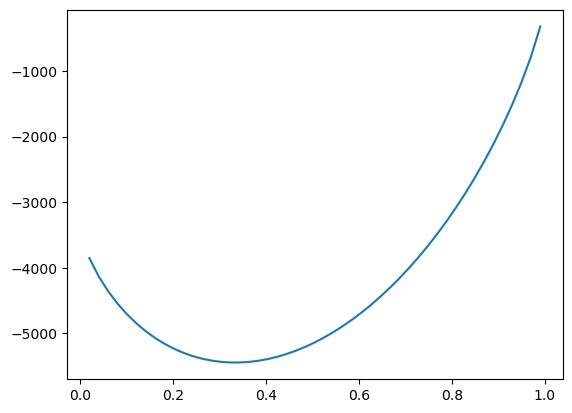

In [11]:
plt.plot(xi_value, result)

In [36]:
import numpy as np
from scipy.optimize import curve_fit

# Given data
T_values = np.array([800, 825, 900, 953, 1000])
ln_K_values = np.array([-3.263, -3.007, -1.899, -1.173, -0.591])
R = 8.314  # J/(mol·K)

# Function for fitting the data
def linear_fit(x, m, c):
    return m * x + c

# Fit the data to the linear equation
fit_params, _ = curve_fit(linear_fit, 1 / T_values, ln_K_values)

# Extract the slope and y-intercept
slope, intercept = fit_params

# Calculate Delta_rG^o at 900 K
T_900 = 900
delta_rH_900 = -slope * R
delta_rS_900 = -intercept * R
delta_rG_900_corrected = delta_rH_900 - T_900 * delta_rS_900

# Display the results
print(f"Delta_rG^o at 900 K: {delta_rG_900_corrected:.2f} J/mol")
print(f"Delta_rH^o at 900 K: {delta_rH_900:.2f} J/mol")
print(f"Delta_rS^o at 900 K: {delta_rS_900:.2f} J/(mol·K)")


Delta_rG^o at 900 K: 166654.85 J/mol
Delta_rH^o at 900 K: 90215.93 J/mol
Delta_rS^o at 900 K: -84.93 J/(mol·K)


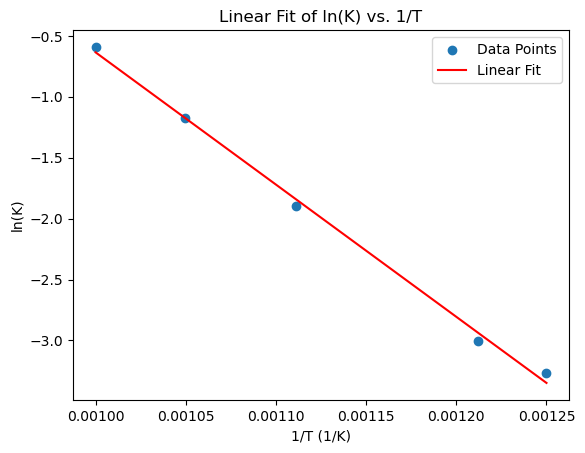

In [38]:
# Plotting the data and the linear fit
plt.scatter(1 / T_values, ln_K_values, label='Data Points')
plt.plot(1 / T_values, linear_fit(1 / T_values, *fit_params), color='red', label='Linear Fit')
plt.xlabel('1/T (1/K)')
plt.ylabel('ln(K)')
plt.title('Linear Fit of ln(K) vs. 1/T')
plt.legend()
plt.show()